In [109]:
#第一步 先观察一下数据分布

In [110]:
# 导入库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 设置全局中文字体（Windows常见字体）
plt.rcParams['font.family'] = 'SimHei'  # 黑体
plt.rcParams['axes.unicode_minus'] = False  # 正常显示负号

In [111]:
# 加载你的数据文件（拖进来或复制路径）
df = pd.read_csv('数据分析：train_data.csv')


In [112]:
# 将所有的字符串转为数字  这里只用处理 Machine_Type
df['Machine_Type'] = df['Machine_Type'].astype('category').cat.codes


In [113]:
#调试用来查看类型的部分
#df['AI_Supervision'].head()

# 获取列标题
column_names = df.columns.tolist()

# 打印看看
print("列标题共", len(column_names), "个：")
print(column_names)


列标题共 22 个：
['Machine_ID', 'Machine_Type', 'Installation_Year', 'Operational_Hours', 'Temperature_C', 'Vibration_mms', 'Sound_dB', 'Oil_Level_pct', 'Coolant_Level_pct', 'Power_Consumption_kW', 'Last_Maintenance_Days_Ago', 'Maintenance_History_Count', 'Failure_History_Count', 'AI_Supervision', 'Error_Codes_Last_30_Days', 'Remaining_Useful_Life_days', 'Failure_Within_7_Days', 'Laser_Intensity', 'Hydraulic_Pressure_bar', 'Coolant_Flow_L_min', 'Heat_Index', 'AI_Override_Events']


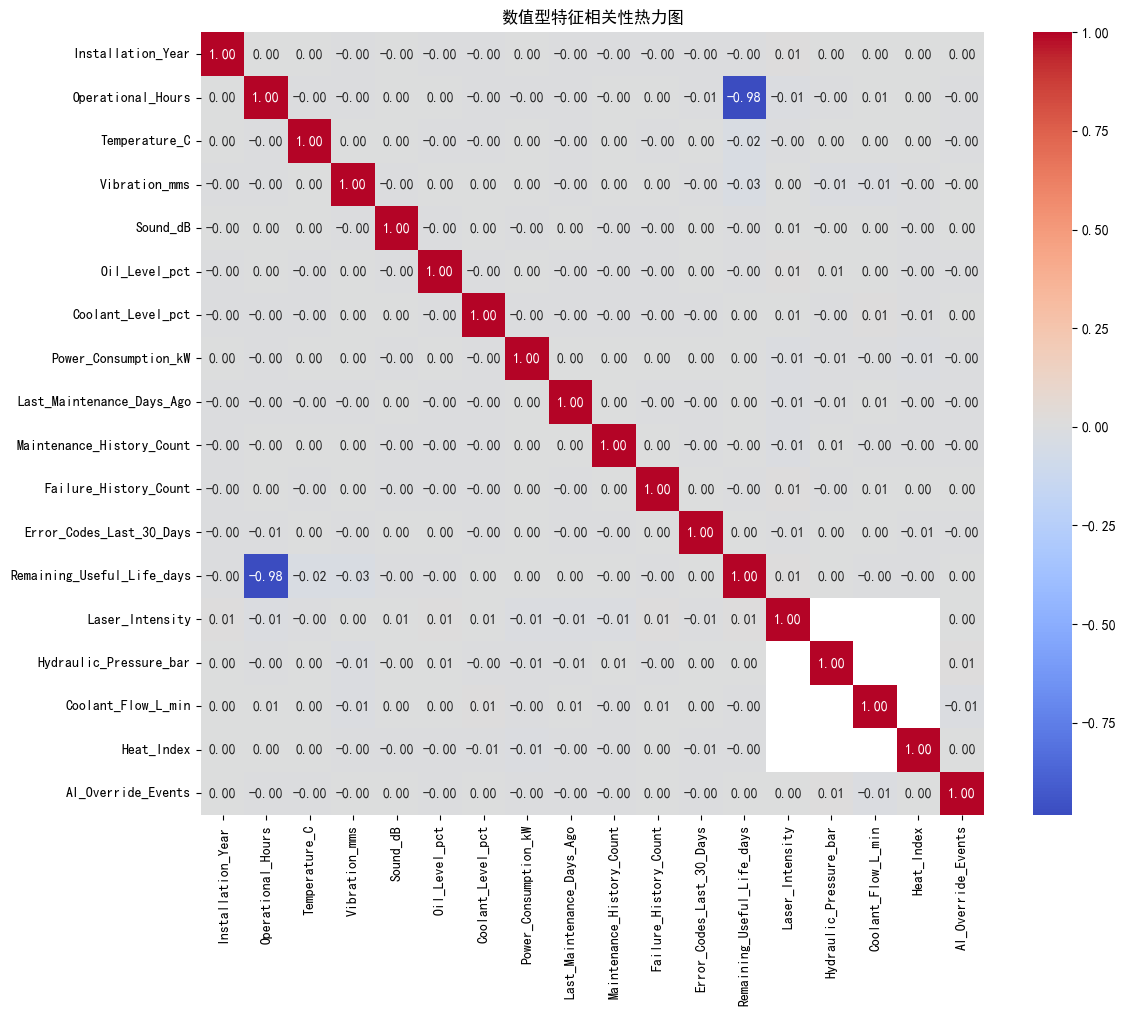

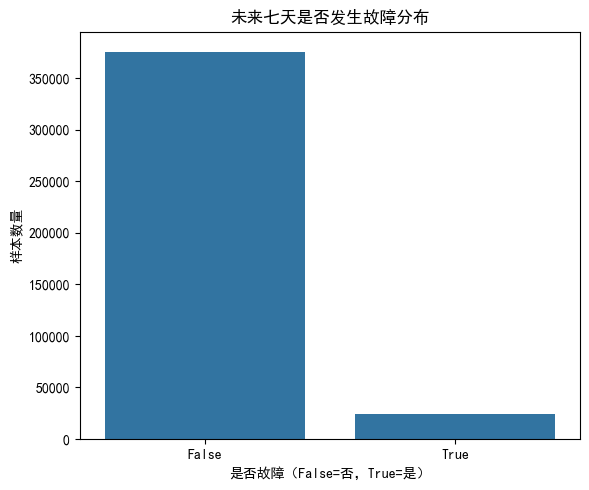

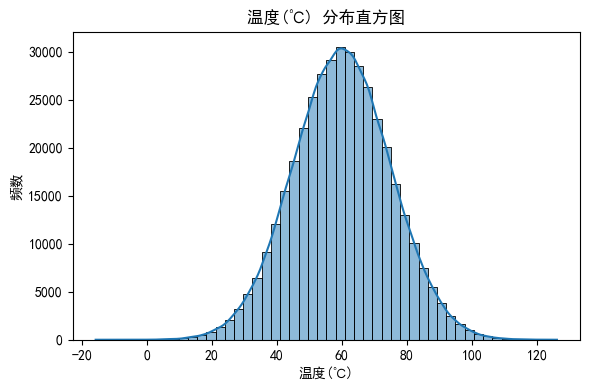

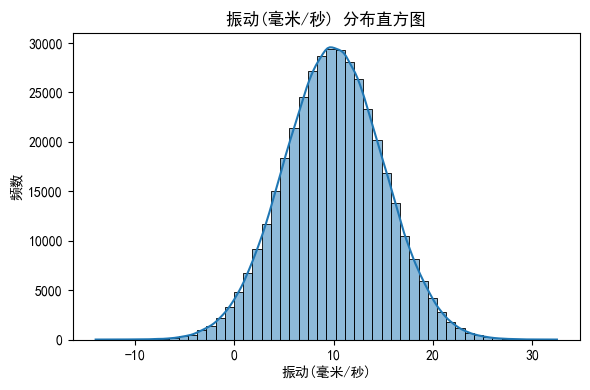

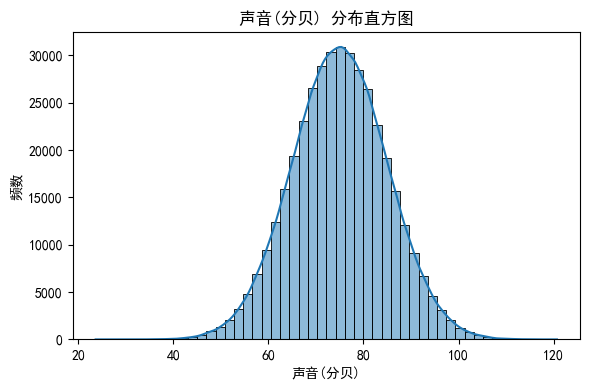

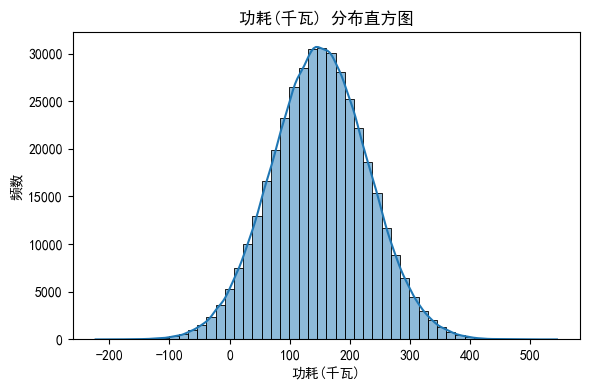

In [114]:
'''
# 选取数值型字段
num_cols = ['Installation_Year','Operational_Hours','Temperature_C','Vibration_mms',
            'Sound_dB','Oil_Level_pct','Coolant_Level_pct','Power_Consumption_kW',
            'Last_Maintenance_Days_Ago', 'Maintenance_History_Count', 'Failure_History_Count',
            'Error_Codes_Last_30_Days', 'Remaining_Useful_Life_days', 'Laser_Intensity', 
            'Hydraulic_Pressure_bar', 'Coolant_Flow_L_min', 'Heat_Index', 'AI_Override_Events']
'''
numeric_df = df.select_dtypes(include='number')
#英文翻中文字典
col_name_map = {
    'Machine_ID': '机器编号','Machine_Type': '机器类型','Installation_Year': '安装年份',
    'Operational_Hours': '运行小时数','Temperature_C': '温度(℃)','Vibration_mms': '振动(毫米/秒)',
    'Sound_dB': '声音(分贝)','Oil_Level_pct': '油位(百分比)','Coolant_Level_pct': '冷却液位(百分比)',
    'Power_Consumption_kW': '功耗(千瓦)','Last_Maintenance_Days_Ago': '距上次维护天数',
    'Maintenance_History_Count': '维护历史次数','Failure_History_Count': '故障历史次数',
    'AI_Supervision': '人工智能监控','Error_Codes_Last_30_Days': '过去30天错误编码',
    'Remaining_Useful_Life_days': '剩余使用寿命(天)','Failure_Within_7_Days': '7天内故障预测',
    'Laser_Intensity': '激光强度','Hydraulic_Pressure_bar': '液压压力','Coolant_Flow_L_min': '冷却液流量(升/分钟)',
    'Heat_Index': '热指数','AI_Override_Events': '人工智能覆盖'
}


# ----------  1.相关性热力图  ----------
plt.figure(figsize=(12,10))
corr = df[num_cols].corr()
sns.heatmap(corr,annot=True,fmt=".2f",cmap="coolwarm",square=True)
plt.title("数值型特征相关性热力图")
plt.tight_layout()
plt.show()

# ---------- 2.故障标签分布 ----------
plt.figure(figsize=(6,5))
sns.countplot(x="Failure_Within_7_Days",data=df)
plt.title("未来七天是否发生故障分布")
plt.xlabel("是否故障（False=否，True=是）")
plt.ylabel('样本数量')
plt.tight_layout()
plt.show()

# ---------- 3.部分特征的分布直方图（中文） ----------
feature_to_plot=['Temperature_C','Vibration_mms','Sound_dB','Power_Consumption_kW',]
for col in feature_to_plot:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col].dropna(),bins=50,kde=True)
    plt.title(f"{col_name_map[col]} 分布直方图")
    plt.xlabel(col_name_map[col])
    plt.ylabel('频数')
    plt.tight_layout()
    plt.show()

In [115]:
# 查看缺失值
df.isnull().sum()

# 发现有四个数据列缺失值较多，我们选择将他删除
cols_to_drop = ['Laser_Intensity', 'Hydraulic_Pressure_bar','Coolant_Flow_L_min','Heat_Index']
df = df.drop(columns=cols_to_drop)

# 查看当前列数和列名
print(f"剩下 {df.shape[1]} 列：")
print(df.columns.tolist())

剩下 18 列：
['Machine_ID', 'Machine_Type', 'Installation_Year', 'Operational_Hours', 'Temperature_C', 'Vibration_mms', 'Sound_dB', 'Oil_Level_pct', 'Coolant_Level_pct', 'Power_Consumption_kW', 'Last_Maintenance_Days_Ago', 'Maintenance_History_Count', 'Failure_History_Count', 'AI_Supervision', 'Error_Codes_Last_30_Days', 'Remaining_Useful_Life_days', 'Failure_Within_7_Days', 'AI_Override_Events']
